## cargando librerias

In [35]:
library(alr4)
library(MPV)
library(leaps)

## vizualisacion de los datos

In [3]:
head(table.b14)

,x1,x2,x3,x4,x5,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,3,3,3,0,0.787
2,8,30,8,8,0,0.293
3,3,6,6,6,0,1.710
4,4,4,4,12,0,0.203
5,8,7,6,5,0,0.806
6,10,20,5,5,0,4.713


## graficos de dispercion

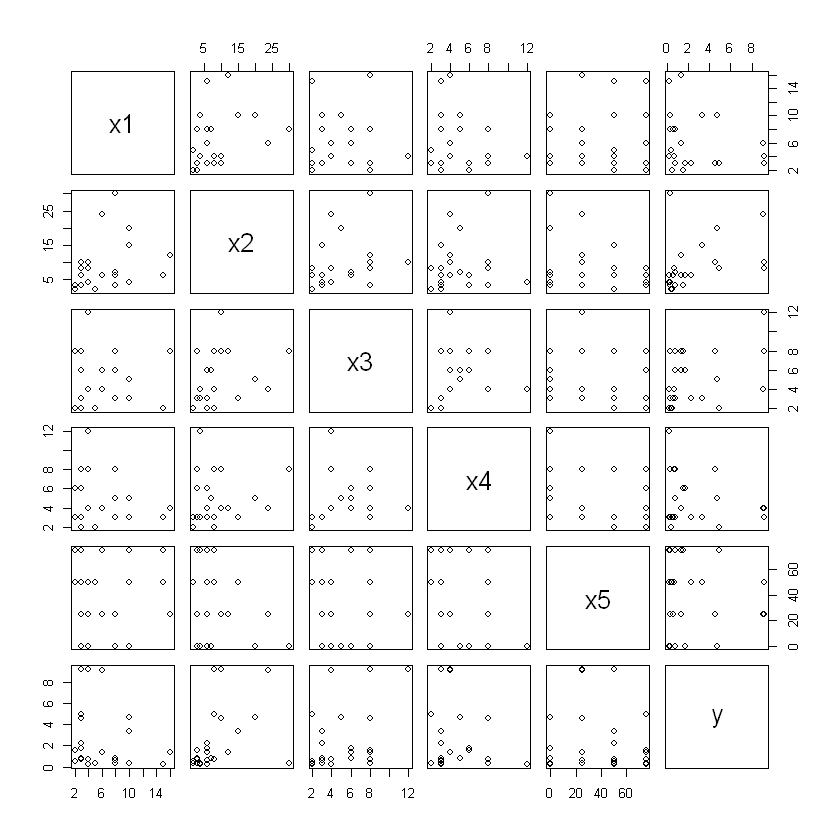

In [4]:
pairs(  table.b14 )

## sumandole una cantidad pequeña a la columnna x5

In [5]:
table.b14$x6 <- table.b14$x5 + 0.1

## selecciion automatica de transformaciones

In [6]:
with( table.b14, summary(powerTransform(cbind(x1,x2,x3,x4,x6)~1)) )

bcPower Transformations to Multinormality 
   Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
x1   -0.2874         0.0      -0.9820       0.4072
x2   -0.2314         0.0      -0.7245       0.2617
x3   -0.4864         0.0      -1.2282       0.2553
x4   -0.8981        -1.0      -1.6349      -0.1614
x6    0.4512         0.5       0.2194       0.6830

Likelihood ratio test that transformation parameters are equal to 0
 (all log transformations)
                                   LRT df       pval
LR test, lambda = (0 0 0 0 0) 24.51186  5 0.00017306

Likelihood ratio test that no transformations are needed
                                  LRT df       pval
LR test, lambda = (1 1 1 1 1) 85.8101  5 < 2.22e-16

## haciendo las transformaciones de el algoritmo anterior

In [7]:
x1 <- table.b14$x1
x2 <- table.b14$x2
x3 <- table.b14$x3
x4 <- table.b14$x4
x5 <- table.b14$x5
x6 <- table.b14$x6
y <- table.b14$y

log.x1 <- log(x1)
log.x2 <- log(x2)
log.x3 <- log(x3)
inv.x4 <- 1/x4
sqrt.x5 <- sqrt(x5)

# ajustando el modelo de regresion

In [8]:
regre1 <- lm( y ~ log.x1 + log.x2 + log.x3 + inv.x4 + sqrt.x5 )
summary(regre1)


Call:
lm(formula = y ~ log.x1 + log.x2 + log.x3 + inv.x4 + sqrt.x5)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5196 -0.8293 -0.2550  0.8742  3.6155 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.42458    2.74170  -2.708  0.01395 *  
log.x1      -2.20598    0.71090  -3.103  0.00586 ** 
log.x2       2.91066    0.67214   4.330  0.00036 ***
log.x3       2.39072    1.02241   2.338  0.03046 *  
inv.x4      15.62662    5.04431   3.098  0.00592 ** 
sqrt.x5      0.07951    0.13273   0.599  0.55625    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.879 on 19 degrees of freedom
Multiple R-squared:  0.6766,	Adjusted R-squared:  0.5915 
F-statistic: 7.949 on 5 and 19 DF,  p-value: 0.0003473


# Box-Cox

bcPower Transformation to Normality 
   Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
Y1   -0.0372           0      -0.3242       0.2499

Likelihood ratio test that transformation parameter is equal to 0
 (log transformation)
                             LRT df    pval
LR test, lambda = (0) 0.06491946  1 0.79888

Likelihood ratio test that no transformation is needed
                           LRT df       pval
LR test, lambda = (1) 44.07503  1 3.1603e-11

lambda,RSS
<dbl>,<dbl>
0.1963291,33.11859
-1.0000000,60.47111
0.0000000,34.20673
1.0000000,45.38435


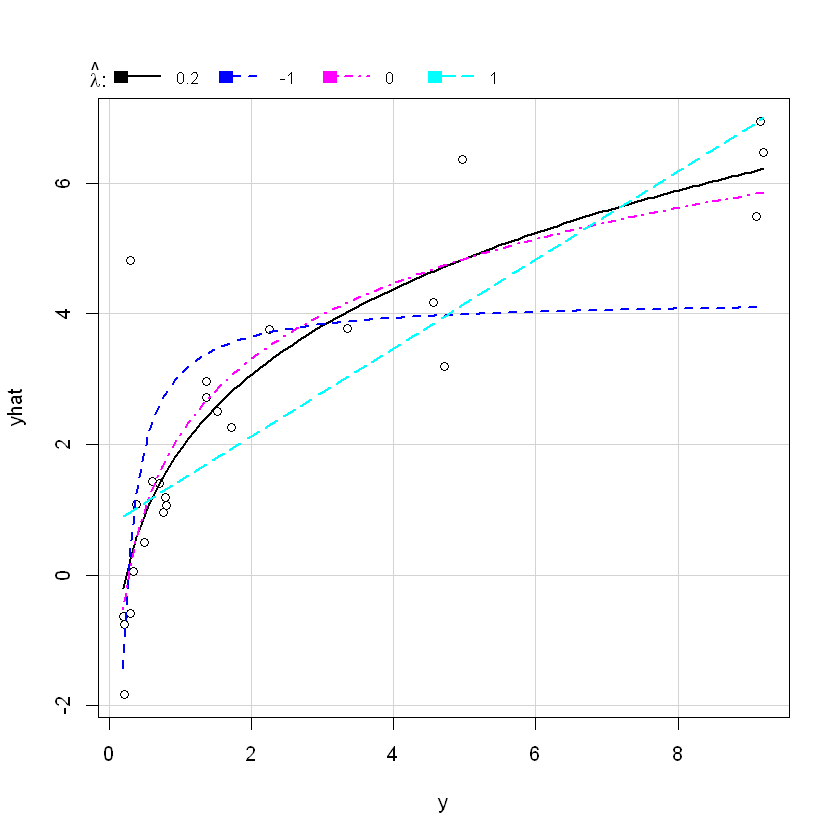

In [9]:
summary(powerTransform(regre1))
inverseResponsePlot(regre1)

# haciendo la transformacion de la respuesta

In [10]:
log.y <- log(y)

## ajustando el modelo de regresion

In [11]:
regre2 <- lm( log.y ~ log.x1 + log.x2 + log.x3 + inv.x4 + sqrt.x5 )
summary(regre2)


Call:
lm(formula = log.y ~ log.x1 + log.x2 + log.x3 + inv.x4 + sqrt.x5)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.40832 -0.10581  0.00382  0.19470  1.16781 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.83335    0.99761  -3.843 0.001098 ** 
log.x1      -1.15089    0.25867  -4.449 0.000275 ***
log.x2       1.27187    0.24457   5.200 5.09e-05 ***
log.x3       1.09134    0.37202   2.934 0.008525 ** 
inv.x4       6.49629    1.83545   3.539 0.002191 ** 
sqrt.x5      0.03797    0.04830   0.786 0.441435    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6837 on 19 degrees of freedom
Multiple R-squared:  0.7675,	Adjusted R-squared:  0.7063 
F-statistic: 12.54 on 5 and 19 DF,  p-value: 1.781e-05


# grafica de residuos

           Test stat Pr(>|Test stat|)
log.x1        0.1086           0.9148
log.x2       -1.6457           0.1172
log.x3       -1.4907           0.1533
inv.x4       -1.6397           0.1184
sqrt.x5      -0.8868           0.3869
Tukey test   -0.4367           0.6623


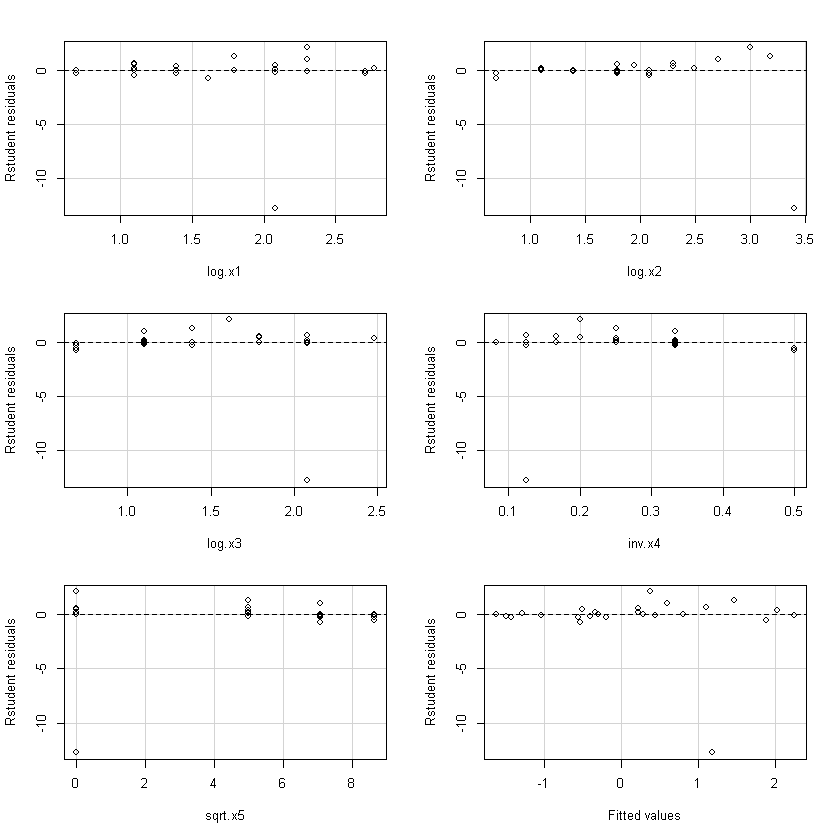

In [12]:
residualPlots(regre2, terms= ~. , type = "rstudent", quadratic=FALSE)

# Graficas de variable agregada

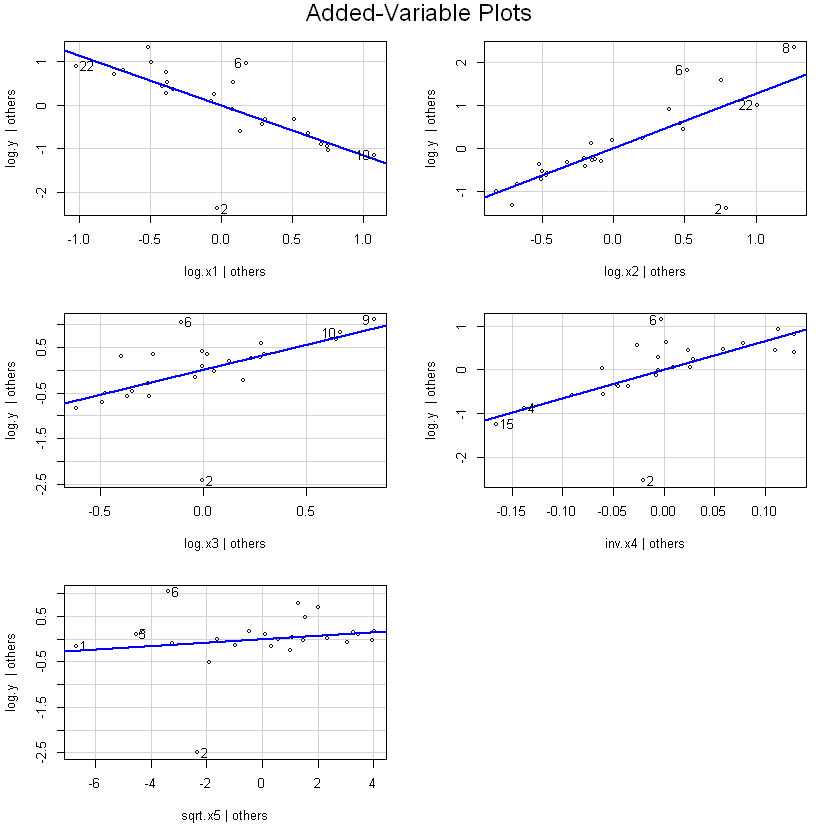

In [13]:
avPlots(regre2)

## Graficas de modelo marginal

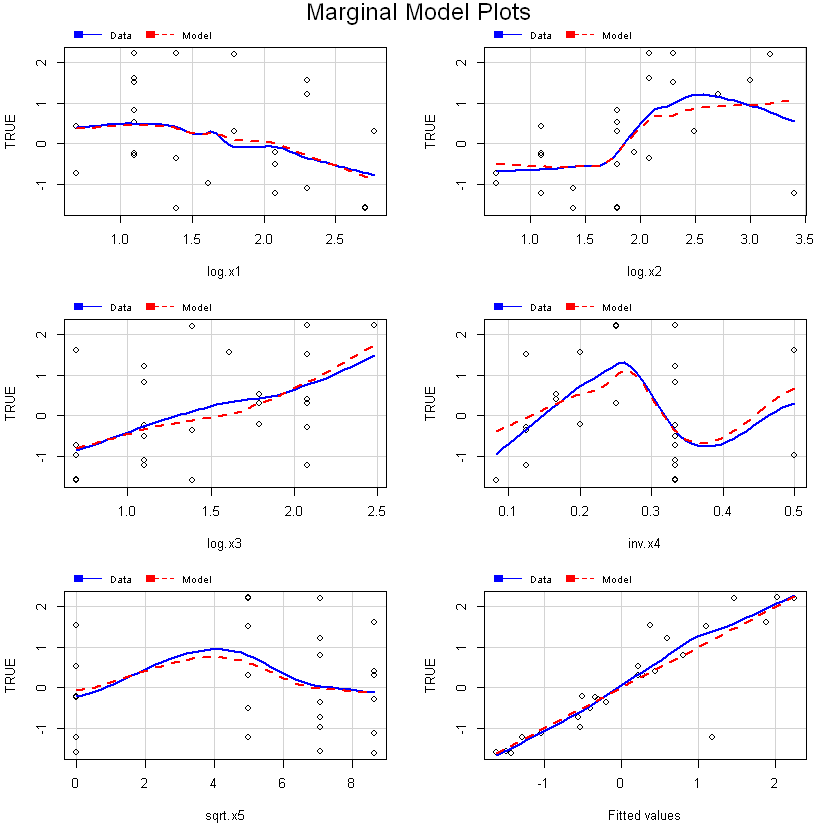

In [14]:
marginalModelPlots(regre2)

## Pruebas de homogeneidad de la varianza

In [15]:
ncvTest(regre2)
ncvTest(regre2, ~ log.x1)
ncvTest(regre2, ~ log.x2)
ncvTest(regre2, ~ log.x3)
ncvTest(regre2, ~ inv.x4)
ncvTest(regre2, ~ sqrt.x5)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 7.453878, Df = 1, p = 0.00633

Non-constant Variance Score Test 
Variance formula: ~ log.x1 
Chisquare = 4.551063, Df = 1, p = 0.032898

Non-constant Variance Score Test 
Variance formula: ~ log.x2 
Chisquare = 39.8245, Df = 1, p = 2.7784e-10

Non-constant Variance Score Test 
Variance formula: ~ log.x3 
Chisquare = 7.205166, Df = 1, p = 0.0072694

Non-constant Variance Score Test 
Variance formula: ~ inv.x4 
Chisquare = 9.990701, Df = 1, p = 0.0015733

Non-constant Variance Score Test 
Variance formula: ~ sqrt.x5 
Chisquare = 21.30904, Df = 1, p = 3.9088e-06

## Analisis de influencia

13           25           23            4           12           24 
3.155797e-07 3.283132e-06 1.879086e-05 8.173477e-05 1.811980e-04 1.918218e-04 
          14            7           21           19           10            1 
2.154751e-04 3.558387e-04 6.079962e-04 1.040608e-03 1.861012e-03 2.501616e-03 
          17           20           15            9            5            3 
4.886007e-03 5.619250e-03 6.005812e-03 7.535624e-03 8.949091e-03 1.054676e-02 
          11           22           18           16            8            6 
1.388226e-02 3.273662e-02 3.394172e-02 4.263081e-02 8.659909e-02 1.692012e-01 
           2 
1.078317e+00

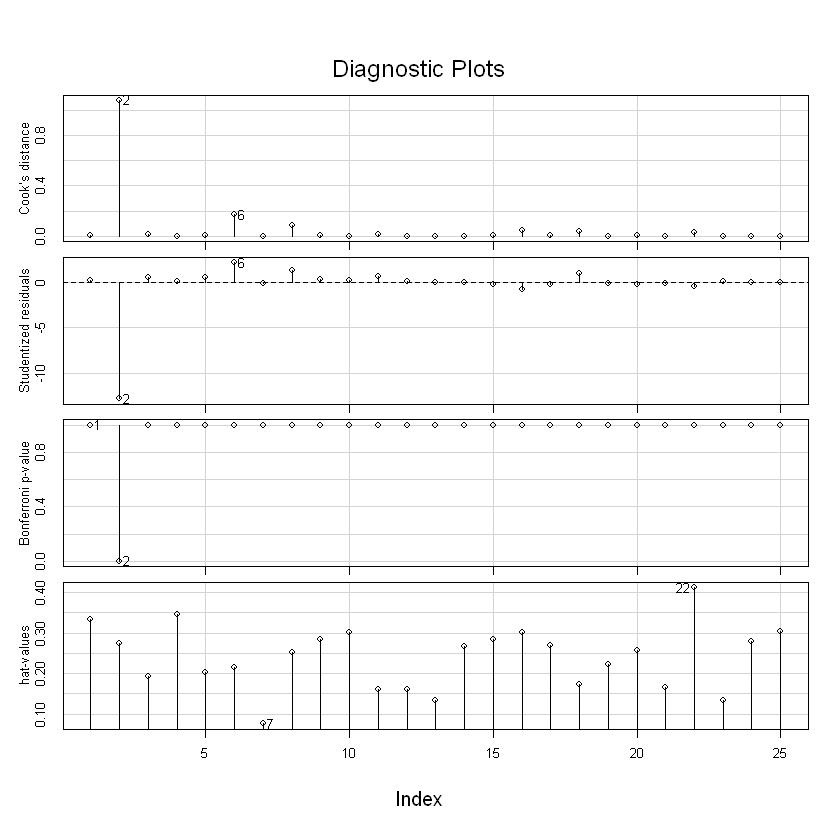

In [16]:
infIndexPlot(regre2)
sort(cooks.distance(regre2))

## Prueba sobre puntos discrepantes

In [17]:
outlierTest(regre2)

   rstudent unadjusted p-value Bonferroni p
2 -12.73682         1.9223e-10   4.8058e-09

# Grafica de probabilidad normal

[1] 2 6

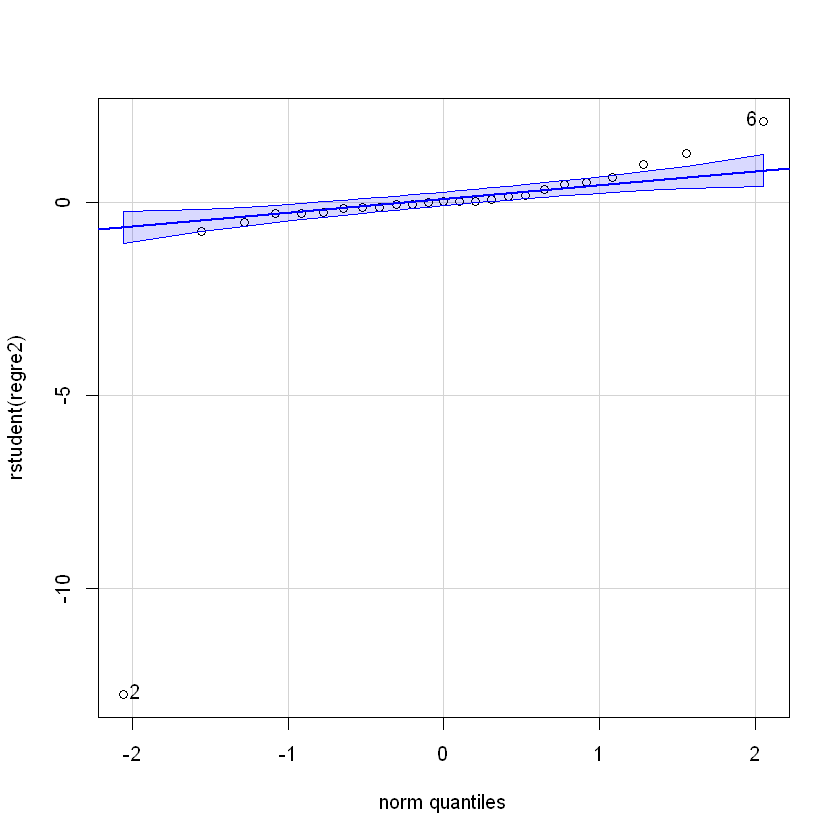

In [18]:
qqPlot(rstudent(regre2))

In [19]:
regre3 <- lm( log.y ~ log.x1 + log.x2 + log.x3 + inv.x4 + sqrt.x5, subset=-c(2) )
summary(regre3)


Call:
lm(formula = log.y ~ log.x1 + log.x2 + log.x3 + inv.x4 + sqrt.x5, 
    subset = -c(2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37966 -0.12003 -0.00369  0.15326  0.43031 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.9653503  0.3240790 -12.236 3.69e-10 ***
log.x1      -1.1640811  0.0839948 -13.859 4.81e-11 ***
log.x2       1.6082806  0.0836860  19.218 1.92e-13 ***
log.x3       1.0855291  0.1207920   8.987 4.50e-08 ***
inv.x4       6.0034783  0.5972049  10.053 8.24e-09 ***
sqrt.x5     -0.0008676  0.0159754  -0.054    0.957    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.222 on 18 degrees of freedom
Multiple R-squared:  0.9755,	Adjusted R-squared:  0.9688 
F-statistic: 143.6 on 5 and 18 DF,  p-value: 7.457e-14


In [20]:
ncvTest(regre3)
ncvTest(regre3, ~ log.x1[-2])
ncvTest(regre3, ~ log.x2[-2])
ncvTest(regre3, ~ log.x3[-2])
ncvTest(regre3, ~ inv.x4[-2])
ncvTest(regre3, ~ sqrt.x5[-2])

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.2238477, Df = 1, p = 0.63612

Non-constant Variance Score Test 
Variance formula: ~ log.x1[-2] 
Chisquare = 0.6549386, Df = 1, p = 0.41835

Non-constant Variance Score Test 
Variance formula: ~ log.x2[-2] 
Chisquare = 3.124744, Df = 1, p = 0.077112

Non-constant Variance Score Test 
Variance formula: ~ log.x3[-2] 
Chisquare = 0.0004142394, Df = 1, p = 0.98376

Non-constant Variance Score Test 
Variance formula: ~ inv.x4[-2] 
Chisquare = 1.079523, Df = 1, p = 0.2988

Non-constant Variance Score Test 
Variance formula: ~ sqrt.x5[-2] 
Chisquare = 0.4854335, Df = 1, p = 0.48597

           Test stat Pr(>|Test stat|)   
log.x1        0.1452         0.886248   
log.x2        3.5344         0.002547 **
log.x3       -0.7791         0.446638   
inv.x4       -1.4389         0.168338   
sqrt.x5       0.4435         0.662966   
Tukey test   -0.5323         0.594546   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


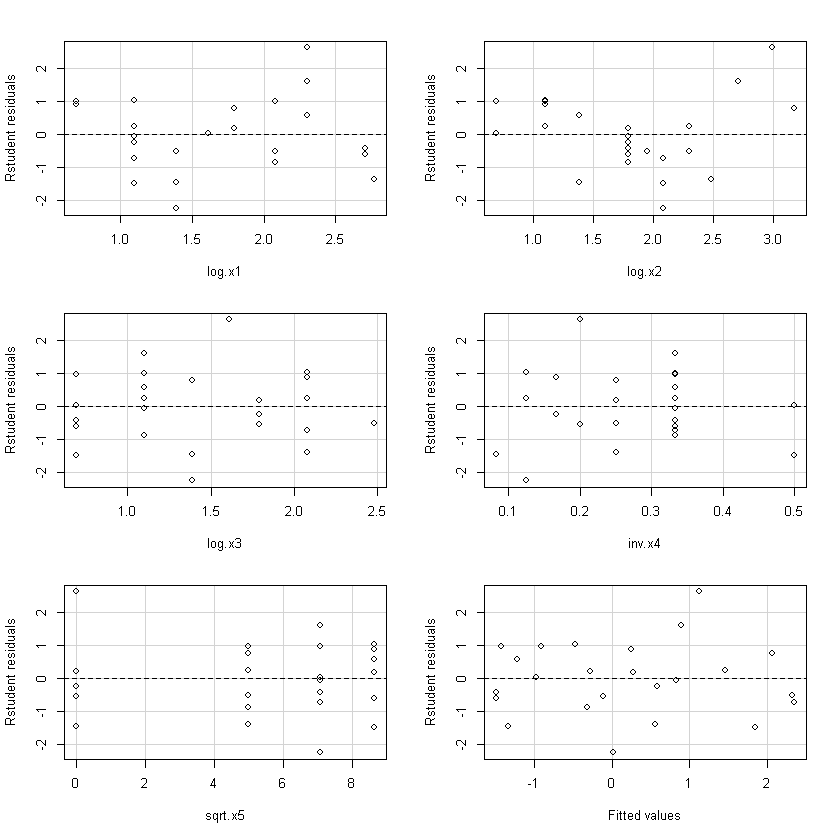

In [21]:
residualPlots(regre3, terms= ~. , type = "rstudent", quadratic=FALSE)

In [24]:
log.x2.cuad <- log.x2^2

In [25]:
regre4 <- lm( log.y ~ log.x1 + log.x2 + log.x3 + inv.x4 + sqrt.x5 + log.x2.cuad, subset=-c(2) )
summary(regre4)


Call:
lm(formula = log.y ~ log.x1 + log.x2 + log.x3 + inv.x4 + sqrt.x5 + 
    log.x2.cuad, subset = -c(2))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.296464 -0.071229  0.005555  0.100674  0.252948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.27972    0.31895 -10.283 1.03e-08 ***
log.x1      -1.12467    0.06656 -16.897 4.61e-12 ***
log.x2       0.62992    0.28442   2.215  0.04073 *  
log.x3       1.13999    0.09562  11.923 1.11e-09 ***
inv.x4       5.89855    0.46750  12.617 4.65e-10 ***
sqrt.x5      0.00440    0.01257   0.350  0.73061    
log.x2.cuad  0.25477    0.07208   3.534  0.00255 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1734 on 17 degrees of freedom
Multiple R-squared:  0.9859,	Adjusted R-squared:  0.9809 
F-statistic: 198.2 on 6 and 17 DF,  p-value: 8.993e-15


            Test stat Pr(>|Test stat|)  
log.x1         0.1186          0.90703  
log.x2        -1.5476          0.14128  
log.x3        -0.9471          0.35768  
inv.x4        -1.7667          0.09635 .
sqrt.x5        1.3482          0.19637  
log.x2.cuad    0.9184          0.37203  
Tukey test    -0.6935          0.48799  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


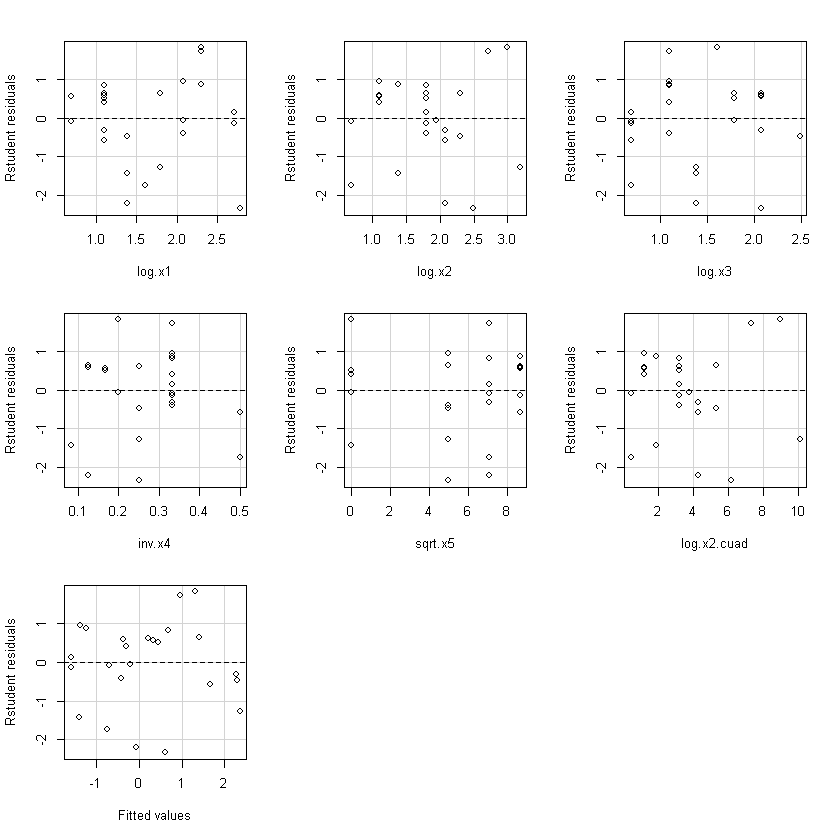

In [26]:
residualPlots(regre4, terms= ~. , type = "rstudent", quadratic=FALSE)

In [27]:
inv.x4.cuad <- inv.x4^2

In [28]:
regre5 <- lm( log.y ~ log.x1 + log.x2 + log.x3 + inv.x4 + sqrt.x5 + log.x2.cuad + inv.x4.cuad, subset=-c(2) )
summary(regre5)


Call:
lm(formula = log.y ~ log.x1 + log.x2 + log.x3 + inv.x4 + sqrt.x5 + 
    log.x2.cuad + inv.x4.cuad, subset = -c(2))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.271066 -0.091916 -0.002803  0.082031  0.247109 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.449792   0.315776 -10.925 7.92e-09 ***
log.x1      -1.167404   0.067260 -17.356 8.41e-12 ***
log.x2       0.642378   0.268278   2.394  0.02924 *  
log.x3       1.102611   0.092607  11.906 2.30e-09 ***
inv.x4       8.366331   1.464767   5.712 3.21e-05 ***
sqrt.x5      0.004335   0.011852   0.366  0.71930    
log.x2.cuad  0.250530   0.068008   3.684  0.00201 ** 
inv.x4.cuad -4.488696   2.540784  -1.767  0.09635 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1635 on 16 degrees of freedom
Multiple R-squared:  0.9882,	Adjusted R-squared:  0.983 
F-statistic: 191.5 on 7 and 16 DF,  p-value: 3.239e-14


            Test stat Pr(>|Test stat|)  
log.x1        -0.3726          0.71465  
log.x2        -1.5368          0.14516  
log.x3        -0.7437          0.46856  
inv.x4        -0.2186          0.82990  
sqrt.x5        1.8161          0.08939 .
log.x2.cuad    0.5605          0.58340  
inv.x4.cuad    0.1118          0.91250  
Tukey test    -0.8508          0.39491  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


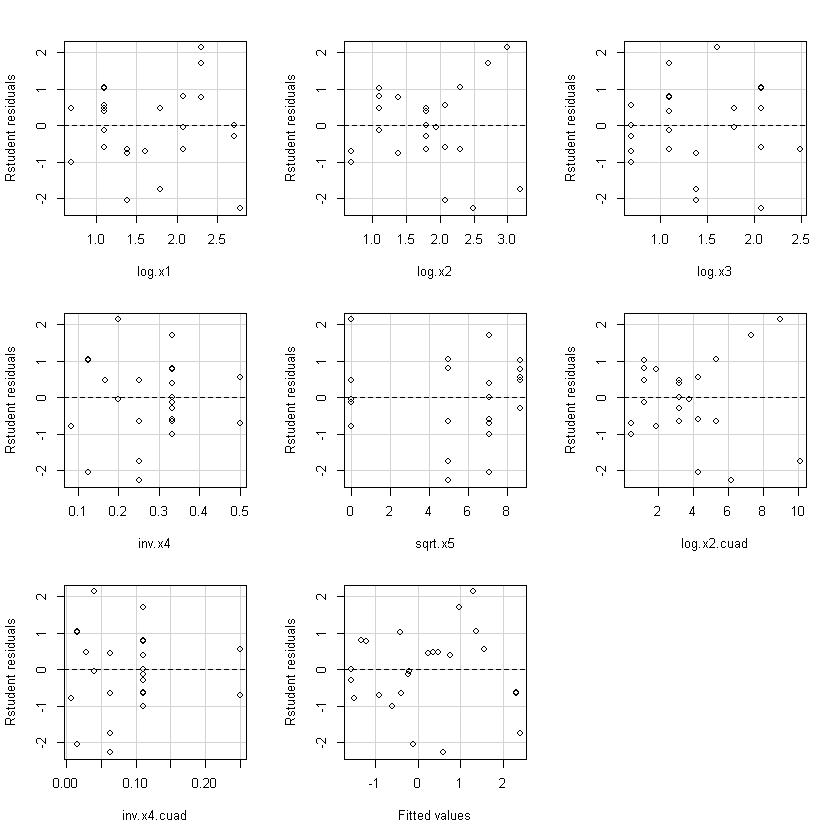

In [29]:
residualPlots(regre5, terms= ~. , type = "rstudent", quadratic=FALSE)

In [30]:
regre6 <- lm( log.y ~ log.x1 + log.x2 + log.x3 + inv.x4 + sqrt.x5 + log.x2.cuad + inv.x4.cuad + x5, subset=-c(2) )
summary(regre6)


Call:
lm(formula = log.y ~ log.x1 + log.x2 + log.x3 + inv.x4 + sqrt.x5 + 
    log.x2.cuad + inv.x4.cuad + x5, subset = -c(2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21690 -0.08321 -0.00959  0.05687  0.24720 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.486175   0.295959 -11.779 5.57e-09 ***
log.x1      -1.167332   0.062895 -18.560 9.29e-12 ***
log.x2       0.578973   0.253283   2.286 0.037226 *  
log.x3       1.123812   0.087379  12.861 1.67e-09 ***
inv.x4       8.893172   1.400076   6.352 1.30e-05 ***
sqrt.x5     -0.064224   0.039344  -1.632 0.123408    
log.x2.cuad  0.273822   0.064874   4.221 0.000741 ***
inv.x4.cuad -5.181579   2.406307  -2.153 0.047971 *  
x5           0.008242   0.004538   1.816 0.089390 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1529 on 15 degrees of freedom
Multiple R-squared:  0.9903,	Adjusted R-squared:  0.9852 
F-statistic: 192.1 on 8 and 15 

            Test stat Pr(>|Test stat|)
log.x1        -0.6202           0.5451
log.x2        -1.3933           0.1853
log.x3        -0.4671           0.6476
inv.x4         0.0907           0.9290
sqrt.x5        0.3634           0.7217
log.x2.cuad   -0.0356           0.9721
inv.x4.cuad   -0.5411           0.5969
x5             0.1876           0.8539
Tukey test    -0.5323           0.5945


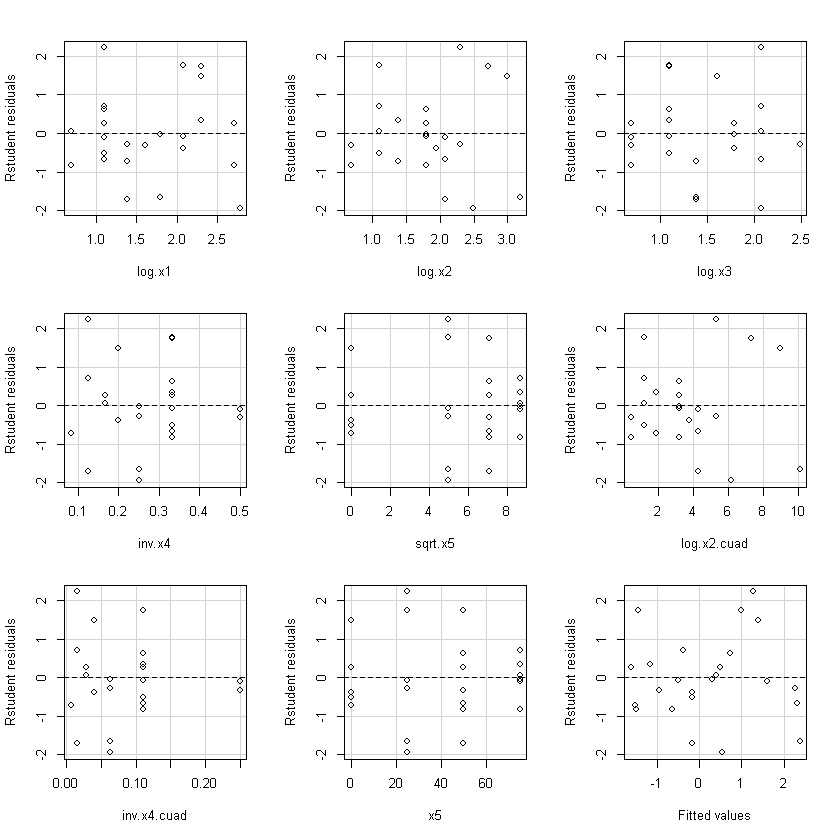

In [31]:
residualPlots(regre6, terms= ~. , type = "rstudent", quadratic=FALSE)

In [32]:
ncvTest(regre6)
ncvTest(regre6, ~ log.x1[-2])
ncvTest(regre6, ~ log.x2[-2])
ncvTest(regre6, ~ log.x3[-2])
ncvTest(regre6, ~ inv.x4[-2])
ncvTest(regre6, ~ sqrt.x5[-2])

ncvTest(regre6, ~ log.x2.cuad[-2])
ncvTest(regre6, ~ inv.x4.cuad[-2])
ncvTest(regre6, ~ x5[-2])


sort(cooks.distance(regre6))

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.5979653, Df = 1, p = 0.43936

Non-constant Variance Score Test 
Variance formula: ~ log.x1[-2] 
Chisquare = 1.148859, Df = 1, p = 0.28379

Non-constant Variance Score Test 
Variance formula: ~ log.x2[-2] 
Chisquare = 3.910252, Df = 1, p = 0.047992

Non-constant Variance Score Test 
Variance formula: ~ log.x3[-2] 
Chisquare = 0.4524699, Df = 1, p = 0.50116

Non-constant Variance Score Test 
Variance formula: ~ inv.x4[-2] 
Chisquare = 1.24097, Df = 1, p = 0.26528

Non-constant Variance Score Test 
Variance formula: ~ sqrt.x5[-2] 
Chisquare = 0.02283381, Df = 1, p = 0.87989

Non-constant Variance Score Test 
Variance formula: ~ log.x2.cuad[-2] 
Chisquare = 4.36452, Df = 1, p = 0.036695

Non-constant Variance Score Test 
Variance formula: ~ inv.x4.cuad[-2] 
Chisquare = 1.338891, Df = 1, p = 0.24723

Non-constant Variance Score Test 
Variance formula: ~ x5[-2] 
Chisquare = 0.6615963, Df = 1, p = 0.416

23            7           24           19            3           22 
4.153796e-05 1.971248e-04 1.986164e-04 2.957292e-03 3.157927e-03 3.588268e-03 
          21            9            5           13            1           14 
4.473989e-03 5.137647e-03 6.159764e-03 1.576695e-02 2.271509e-02 2.298674e-02 
          16           25           20            4           18           17 
3.200865e-02 3.807419e-02 3.877161e-02 5.688880e-02 7.379767e-02 8.578802e-02 
          12           15           10           11            6            8 
1.243747e-01 1.662590e-01 2.073789e-01 2.179535e-01 2.297537e-01 3.302309e-01

## Prueba sobre puntos discrepantes

In [33]:
outlierTest(regre6)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
11 2.225936           0.042957           NA

## Grafica de probabilidad normal

11 10 
10  9

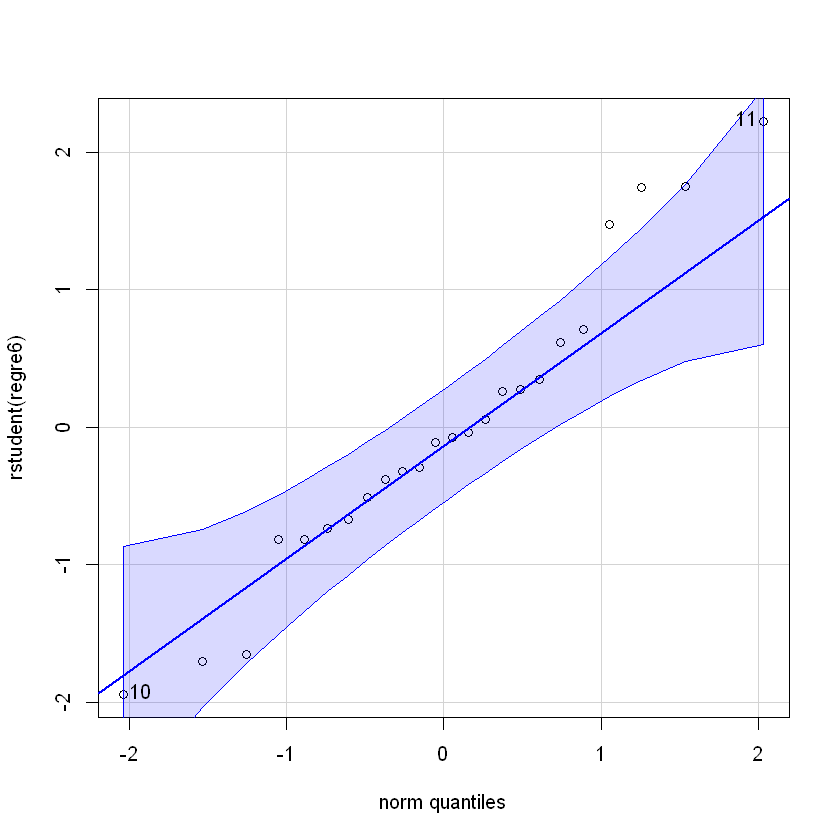

In [34]:
qqPlot(rstudent(regre6))

In [37]:
cemento<- read.table("cemento.txt",header=T)

In [38]:
all.submodels <- regsubsets(log.y ~ log.x1 + log.x2 + log.x3 + inv.x4 + sqrt.x5 + log.x2.cuad + inv.x4.cuad + x5, data=cemento,  subset=-c(2), nbest=3)

## plot a table of models showing variables in each model. 

In [39]:
summary(all.submodels)

Subset selection object
Call: regsubsets.formula(log.y ~ log.x1 + log.x2 + log.x3 + inv.x4 + 
    sqrt.x5 + log.x2.cuad + inv.x4.cuad + x5, data = cemento, 
    subset = -c(2), nbest = 3)
8 Variables  (and intercept)
            Forced in Forced out
log.x1          FALSE      FALSE
log.x2          FALSE      FALSE
log.x3          FALSE      FALSE
inv.x4          FALSE      FALSE
sqrt.x5         FALSE      FALSE
log.x2.cuad     FALSE      FALSE
inv.x4.cuad     FALSE      FALSE
x5              FALSE      FALSE
3 subsets of each size up to 8
Selection Algorithm: exhaustive
         log.x1 log.x2 log.x3 inv.x4 sqrt.x5 log.x2.cuad inv.x4.cuad x5 
1  ( 1 ) " "    " "    " "    " "    " "     "*"         " "         " "
1  ( 2 ) " "    "*"    " "    " "    " "     " "         " "         " "
1  ( 3 ) " "    " "    "*"    " "    " "     " "         " "         " "
2  ( 1 ) "*"    "*"    " "    " "    " "     " "         " "         " "
2  ( 2 ) "*"    " "    " "    " "    " "     "*"         "

# models are ordered by the selection statistic.

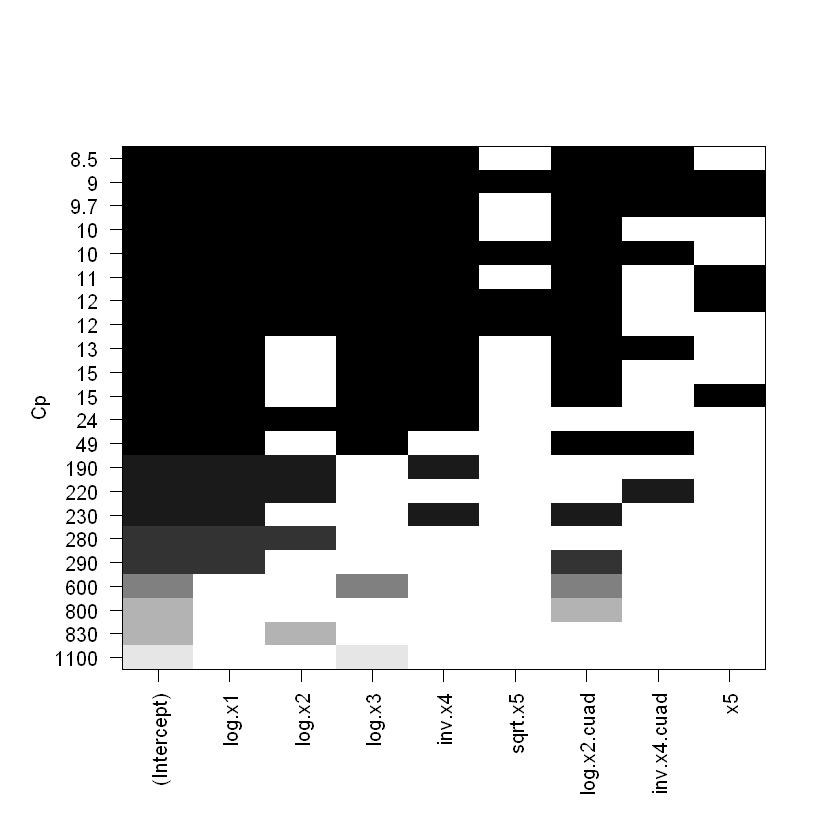

In [40]:
plot(all.submodels, scale="Cp")

# plot statistic by subset size 

# subsets(all.submodels, statistic="cp")

In [41]:
R2adj <- summary(all.submodels)$adjr2
Cp <- summary(all.submodels)$cp
BIC <- summary(all.submodels)$bic

In [42]:
data.frame(summary(all.submodels)$which, R2adj=R2adj, Cp=Cp, BIC=BIC)

,X.Intercept.,log.x1,log.x2,log.x3,inv.x4,sqrt.x5,log.x2.cuad,inv.x4.cuad,x5,R2adj,Cp,BIC
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
X1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,0.4455603,802.788289,-8.865869
X1.1,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,0.4289087,827.499244,-8.155685
X1.2,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,0.2405361,1107.044139,-1.314155
X2,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,0.7892025,280.604182,-30.013736
X2.1,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,0.7837995,288.257732,-29.406341
X2.2,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,0.5604576,604.631669,-12.377667
X3,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,0.8445831,193.671487,-35.321529
X3.1,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,0.8269553,217.453000,-32.742997
X3.2,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,0.8193407,227.725810,-31.709483


In [43]:
regre7 <- lm( log.y ~ log.x1 + log.x2 + log.x3 + inv.x4 + log.x2.cuad + inv.x4.cuad, subset=-c(2) )
summary(regre7)


Call:
lm(formula = log.y ~ log.x1 + log.x2 + log.x3 + inv.x4 + log.x2.cuad + 
    inv.x4.cuad, subset = -c(2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27141 -0.09768 -0.01107  0.09111  0.24414 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.44847    0.30761 -11.211 2.83e-09 ***
log.x1      -1.16812    0.06550 -17.835 1.93e-12 ***
log.x2       0.65105    0.26033   2.501  0.02291 *  
log.x3       1.10519    0.08995  12.286 7.01e-10 ***
inv.x4       8.42301    1.41896   5.936 1.63e-05 ***
log.x2.cuad  0.24758    0.06579   3.763  0.00155 ** 
inv.x4.cuad -4.49155    2.47520  -1.815  0.08727 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1593 on 17 degrees of freedom
Multiple R-squared:  0.9881,	Adjusted R-squared:  0.9839 
F-statistic: 235.4 on 6 and 17 DF,  p-value: 2.131e-15


            Test stat Pr(>|Test stat|)
log.x1        -0.2659           0.7937
log.x2        -0.7660           0.4549
log.x3        -0.6271           0.5395
inv.x4        -1.5320           0.1450
log.x2.cuad    0.5585           0.5843
inv.x4.cuad    0.0941           0.9262
Tukey test    -0.8320           0.4054


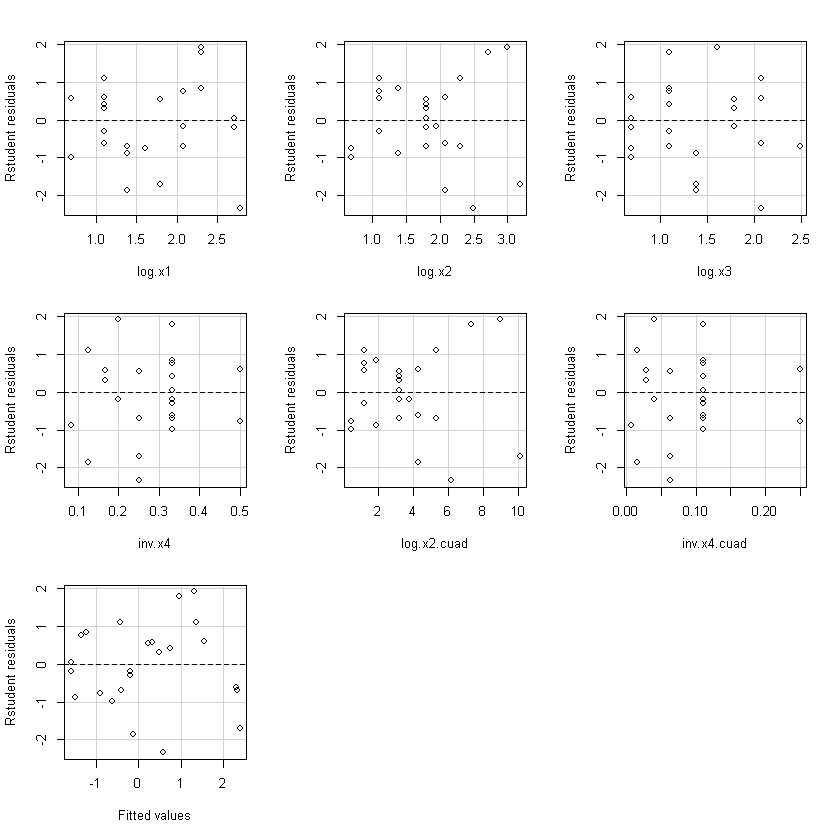

In [44]:
residualPlots(regre7, terms= ~. , type = "rstudent", quadratic=FALSE)

In [45]:
ncvTest(regre7)
ncvTest(regre7, ~ log.x1[-2])
ncvTest(regre7, ~ log.x2[-2])
ncvTest(regre7, ~ log.x3[-2])
ncvTest(regre7, ~ inv.x4[-2])
ncvTest(regre7, ~ log.x2.cuad[-2])
ncvTest(regre7, ~ inv.x4.cuad[-2])

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.081374, Df = 1, p = 0.29839

Non-constant Variance Score Test 
Variance formula: ~ log.x1[-2] 
Chisquare = 1.857408, Df = 1, p = 0.17292

Non-constant Variance Score Test 
Variance formula: ~ log.x2[-2] 
Chisquare = 5.03775, Df = 1, p = 0.024801

Non-constant Variance Score Test 
Variance formula: ~ log.x3[-2] 
Chisquare = 0.7948861, Df = 1, p = 0.37263

Non-constant Variance Score Test 
Variance formula: ~ inv.x4[-2] 
Chisquare = 1.332787, Df = 1, p = 0.24831

Non-constant Variance Score Test 
Variance formula: ~ log.x2.cuad[-2] 
Chisquare = 5.924061, Df = 1, p = 0.014935

Non-constant Variance Score Test 
Variance formula: ~ inv.x4.cuad[-2] 
Chisquare = 1.456829, Df = 1, p = 0.22744

10  6 
 9  5

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,0.4314099,NA,NA,NA,NA
2,15,0.3507146,2,0.08069526,1.725661,0.2115819


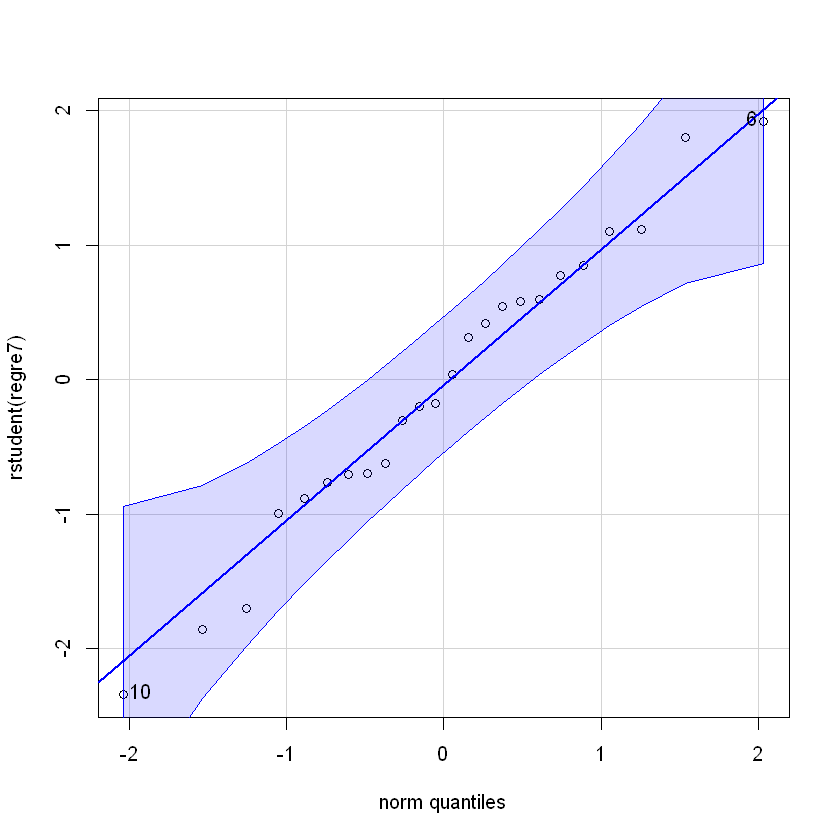

In [46]:
qqPlot(rstudent(regre7))

linearHypothesis(regre6,c("sqrt.x5","x5") )